In [159]:
# %load example_beeview_api
% matplotlib inline
import beeview
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [160]:
# an example scene and interommatidial angles file are in the data folder
renderer = beeview.Renderer("..\..\data\hessen_2016\scene.obj",
                            "..\..\data\ommatidia.csv",left_handed = True)

# change some render parameters
renderer.set_num_samples(30)
renderer.set_acceptance_angle(2.6)
renderer.set_ommatidium_size(1)

bounds = renderer.get_scene_bounds()

In [161]:
print(bounds)

width = bounds[1][0] - bounds[0][0]
height = bounds[1][2] - bounds[0][2]

center_x = bounds[0][0] + width / 2
center_y = bounds[0][2] + height / 2

print(center_x, center_y)

[(-3337.2724609375, -559.916748046875, -3326.6767578125), (3398.78271484375, 2896.938232421875, 3407.249755859375)]
30.755126953125 40.2864990234375


In [162]:
import sys

In [163]:
height = 10

i = 0
while True:
    x = np.random.uniform(center_x - 1000, center_x + 1000)
    y = np.random.uniform(center_y - 1000, center_y + 1000)
    
    z_max = bounds[1][1]
    h_dome = renderer.measure_distance([x, z_max, y], [0, -1, 0])
    h = renderer.measure_distance([x, z_max - h_dome - 1, y], [0, -1, 0])
    
    if h < 0:
        continue
        
    i += 1
    
    ground_level = z_max - h_dome - h - 1
    z = ground_level + np.clip(np.random.normal(height, 10), 1, np.inf)
    
    position = [x, z, y]
    
    renderer.position = position
    renderer.direction = [np.random.uniform(-1, 1), np.random.normal(0, 0.05), np.random.uniform(-1, 1)]
    img = renderer.render()
    
    #t.imshow(img)

    # save the image
    img = Image.fromarray(img)
    img.save("D:/beeview_images/{}.png".format(i))
    
    sys.stdout.write("\r {}".format(i))

 264387

KeyboardInterrupt: 

In [133]:
x, y

(-690.908646516649, 995.7988719112952)

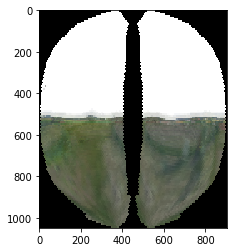

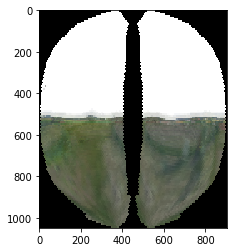

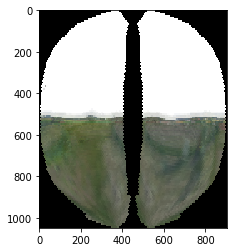

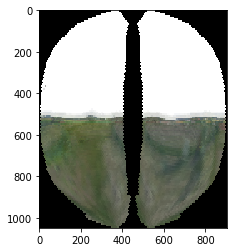

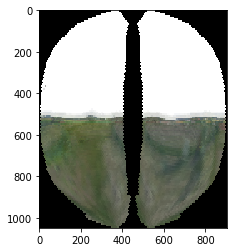

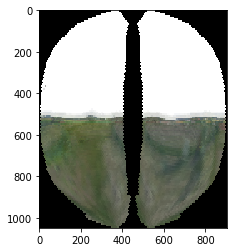

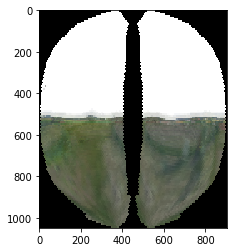

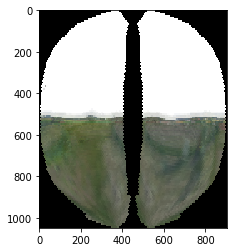

679 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
renderer.mode = renderer.BeeEye
renderer.set_num_samples(26)

img = renderer.render()
plt.imshow(img)
plt.show()

In [5]:
import sys
sys.path.append('D:\Dropbox\FUB\PROJECTS\BeeViews\bee_view_src\lib')
sys.path


['',
 'C:\\Users\\Tim\\Anaconda3\\python36.zip',
 'C:\\Users\\Tim\\Anaconda3\\DLLs',
 'C:\\Users\\Tim\\Anaconda3\\lib',
 'C:\\Users\\Tim\\Anaconda3',
 'C:\\Users\\Tim\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Tim\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Tim\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Tim\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Tim\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Tim\\.ipython',
 'D:\\Dropbox\\FUB\\PROJECTS\\BeeViews\\bee_view_binaries',
 'D:\\Dropbox\\FUB\\PROJECTS\\BeeViews\x08ee_view_src\\lib']